• CONTEXT: The objective of this project is to build a text classification model that
analyses the customer's sentiments based on their reviews in the IMDB database. The
model uses a complex deep learning model to build an embedding layer followed by
a classification algorithm to analyse the sentiment of the customers.

• DATA DESCRIPTION: The Dataset of 50,000 movie reviews from IMDB, labelled by
sentiment (positive/negative). Reviews have been preprocessed, and each review is
encoded as a sequence of word indexes (integers). For convenience, the words are
indexed by their frequency in the dataset, meaning the for that has index 1 is the
most frequent word. Use the first 20 words from each review to speed up training,
using a max vocabulary size of 10,000. As a convention, "0" does not stand for a
specific word, but instead is used to encode any unknown word.

• PROJECT OBJECTIVE: Build a sequential NLP classifier which can use input text
parameters to determine the customer sentiments.

## Imports

In [ ]:
from keras.datasets import imdb
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix

## Loading Data

In [ ]:
# Vocabulary size is 10000
num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=10)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

## Data Preparation and Model Creation

In [ ]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [ ]:
# Summarize size
print("Shape of features: ")
print("Train - ")
print(X_train.shape)
print("Test - ")
print(X_test.shape)
print("Shape of labels: ")
print("Train - ")
print(y_train.shape)
print("Test - ")
print(y_test.shape)

Shape of features: 
Train - 
(25000,)
Test - 
(25000,)
Shape of labels: 
Train - 
(25000,)
Test - 
(25000,)


In [ ]:
# Summarize number of classes
print("Classes: ")
print(np.unique(y))

Classes: 
[0 1]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


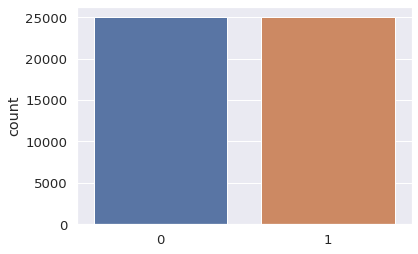

In [ ]:
# Visualising distribution of classes
sns.set(style = "darkgrid" , font_scale = 1.2)
sns.countplot(y)

Equal ditribution of classes observed, so no chance of class imbalance bias.

In [ ]:
# Summarize number of words
print("Total number of words in reviews: ")
print(len(np.unique(np.hstack(X))))

Total number of words in reviews: 
9998


In [ ]:
# Checking value of one feature and its label
print("Label: ")
print(y[0])
print("Features: ")
print(X[0])

Label: 
0
Features: 
[1, 801, 708, 47, 77, 224, 111, 211, 159, 606, 114, 6564, 1002, 8836, 461, 2192, 19, 2, 322, 5, 29, 497, 8, 2, 125, 52, 7465, 3199, 38, 29, 70, 28, 41, 14, 9, 724, 727, 12, 152, 60, 353, 8, 97, 25, 482, 4, 114, 9, 4, 114, 5, 225, 57, 536, 1005, 4, 953, 133, 13, 482, 95, 4, 64, 282, 8, 106, 12, 9, 8, 67, 89, 12, 3209, 21, 164, 9, 224, 1822, 42, 5693, 225, 24, 66, 233, 8, 135, 44, 14, 22, 45, 24, 572, 78, 21, 225, 57, 52, 757, 345, 2609, 299, 2609, 5, 25, 124, 51, 335, 2146, 79, 54, 25, 67, 90, 11, 6, 22, 2, 8836, 2, 47, 35, 616, 6422, 2, 544, 13, 332, 4, 114, 6564, 5, 13, 100, 67, 4, 22, 11, 61, 419, 12, 16, 38, 578, 5, 1121, 13, 296, 12, 5, 12, 4985, 46, 11, 1011, 7, 61, 523, 618, 17, 13, 69, 3792, 13, 421, 24, 6, 2440, 7, 1426, 469, 13, 28, 57, 547, 949, 14, 22, 45, 17, 48, 13, 115, 60, 296, 12, 1069, 14, 45, 6, 184, 1149, 22, 218, 12, 131, 637, 202, 12, 342, 158, 18, 49, 282]


In [ ]:
# Decoding feature value to original sentence 
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in X[0]] )
print("Features in decoded form (original sentence): ")
print(decoded)

1646592/1641221 [==============================] - 0s 0us/step
Features in decoded form (original sentence): 
# typical thriller has been done many times before simple plot outline cop liotta becomes obsessed with # wife and he tries to # off good ol' kurt so he can have her this is beyond predictable it doesn't even try to make you guess the plot is the plot and there's no thinking outside the box here i guess then the only reason to watch it is to see how it develops but nothing is done originally or interestingly there's not really anything to say about this film it's not particularly bad but there's no good points either russell plays russell and you know what you're gonna get when you see him in a film # liotta # has an annoying cher # voice i read the plot outline and i could see the film in my head it was so obvious and basic i watched it and it rolled out in front of my eyes exactly as i had imagined i felt not a drop of emotion throughout i have no feeling towards this film it

In [ ]:
# Sequence padding on data with max length as 500 words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [ ]:
# Create the model
tf.keras.backend.clear_session()
model = Sequential()
model.add(Embedding(num_words, 32, input_length=max_words))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           320000    
_________________________________________________________________
lstm (LSTM)                  (None, 500, 64)           24832     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 250)               16250     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 251       
Total params: 394,357
Trainable params: 394,357
Non-trainable params: 0
__________________________________________________

## Model Training and Evaluation

In [ ]:
# Train and evaluate the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 214s 274ms/step - loss: 0.4013 - accuracy: 0.8141 - val_loss: 0.3636 - val_accuracy: 0.8424
Epoch 2/10
782/782 [==============================] - 214s 274ms/step - loss: 0.2543 - accuracy: 0.9007 - val_loss: 0.3985 - val_accuracy: 0.8283
Epoch 3/10
782/782 [==============================] - 212s 271ms/step - loss: 0.2155 - accuracy: 0.9177 - val_loss: 0.3709 - val_accuracy: 0.8517
Epoch 4/10
782/782 [==============================] - 213s 272ms/step - loss: 0.1428 - accuracy: 0.9477 - val_loss: 0.3858 - val_accuracy: 0.8597
Epoch 5/10
782/782 [==============================] - 213s 272ms/step - loss: 0.1299 - accuracy: 0.9517 - val_loss: 0.3706 - val_accuracy: 0.8580
Epoch 6/10
782/782 [==============================] - 213s 272ms/step - loss: 0.0995 - accuracy: 0.9659 - val_loss: 0.4394 - val_accuracy: 0.8518
Epoch 7/10
782/782 [==============================] - 212s 271ms/step - loss: 0.0745 - accuracy: 0.9748 - val_loss: 0.5323 -

In [ ]:
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

782/782 [==============================] - 59s 76ms/step - loss: 0.6279 - accuracy: 0.8535
Accuracy of the model on Testing Data is -  85.34799814224243 %


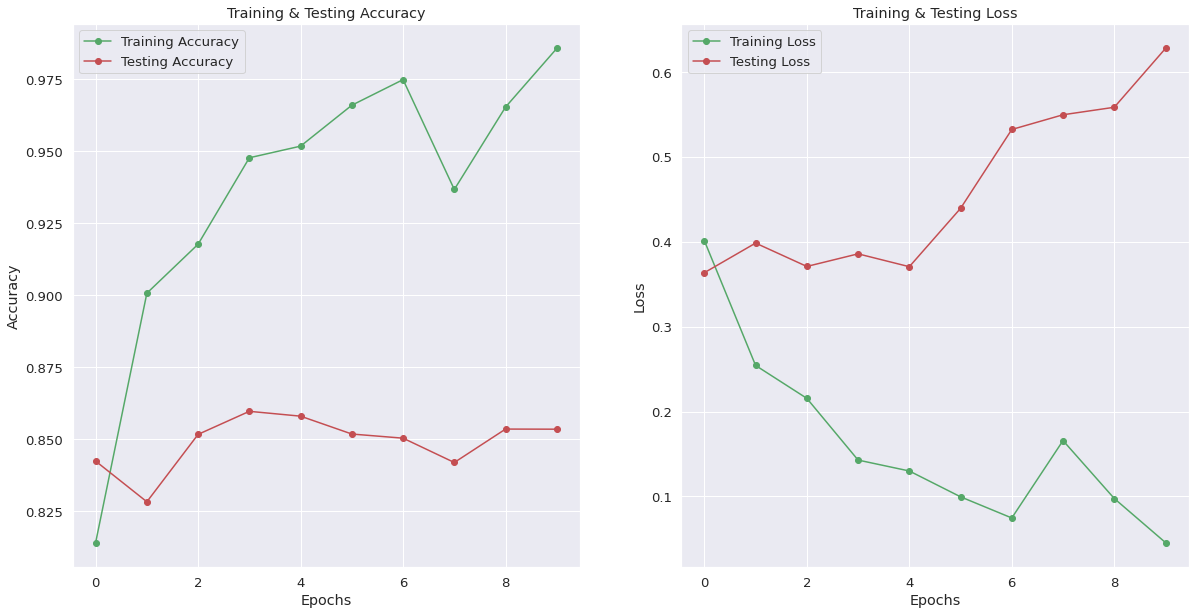

In [ ]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

## Prediction and Classification Report

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred[:5]

array([[5.9813956e-05],
       [5.5617038e-03],
       [2.2986827e-03],
       [2.0993533e-04],
       [1.8970238e-02]], dtype=float32)

In [ ]:
# Converting probabilities into class
y_pred = np.round(y_pred).astype(int)
y_pred[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [ ]:
print(classification_report(y_test, y_pred, target_names = ['Bad Reviews','Good Reviews']))

              precision    recall  f1-score   support

 Bad Reviews       0.87      0.83      0.85     12500
Good Reviews       0.84      0.88      0.86     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[10391  2109]
 [ 1554 10946]]


Text(63.5, 0.5, 'Actual')

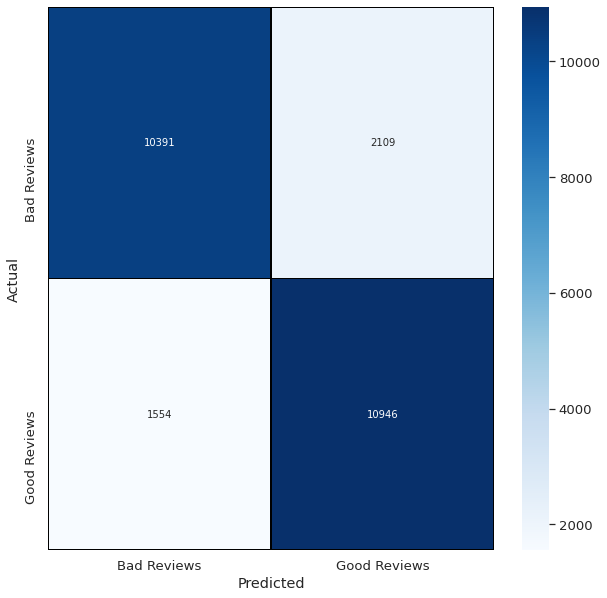

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues",
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Bad Reviews','Good Reviews'], 
            yticklabels = ['Bad Reviews','Good Reviews'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

The data we have taken is as is, and we are seeing all overall precision an recall of about 85% which is fairly good for a simple model that we've made.

## Prediction of a sample

In [ ]:
print("Encoded Features: ")
print(X_test[10])
X_test_sample = " ".join( [reverse_index.get(i - 3, "#") for i in X_test[10]] )
print("Deccoded Review: ")
print(X_test_sample)
print("Actual Label: ")
print(y_test[10])
print("Predicted Label: ")
print(y_pred[10])

Encoded Features: 
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0   